In [74]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"]= 18,10

## Read data from summary file

In [99]:
summary = pd.read_csv("data/atussum_2014.dat")

## Get column names that correspond to Leisure

In [100]:
leisure = summary.columns.str.startswith('t12')

## Sum leisure time per respondant and add to dataframe

In [101]:
summary['leisure'] = summary[summary.columns [leisure]].sum(axis = 1)

## Identify respondants by income and sex

In [102]:
answered_inc = summary[summary["TRERNWA"] >-1]
summary['income'] = pd.qcut(answered_inc.TRERNWA,3,labels=False)
summary.income.fillna(-1,inplace = True)
summary.income = summary.income.map({-1:'unkown',0:'low',1:'med',2:'high'})
summary["sex"] = summary.TESEX.map({1:'male',2:'female'})
summary['age'] = summary.TEAGE
summary = summary[['age','sex','income','leisure']]

## Plots of leisure time
#### vs age by sex

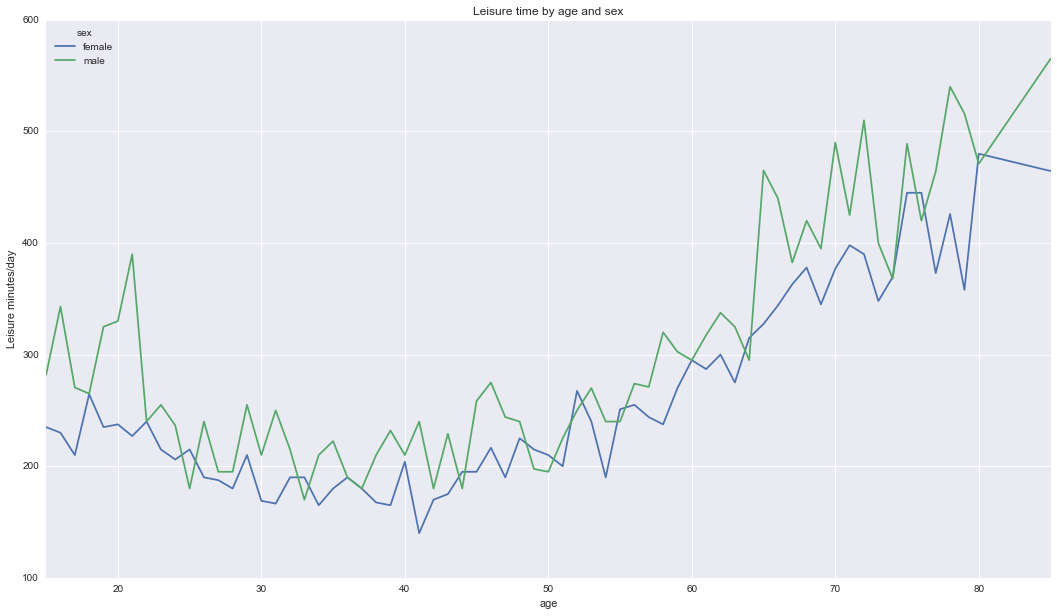

In [96]:
sex_grouped = summary.groupby(['age','sex'])
sex_grouped.leisure.median().unstack().plot()
plt.title("Leisure time by age and sex")
plt.ylabel("Leisure minutes/day")

#### vs age byIncome 

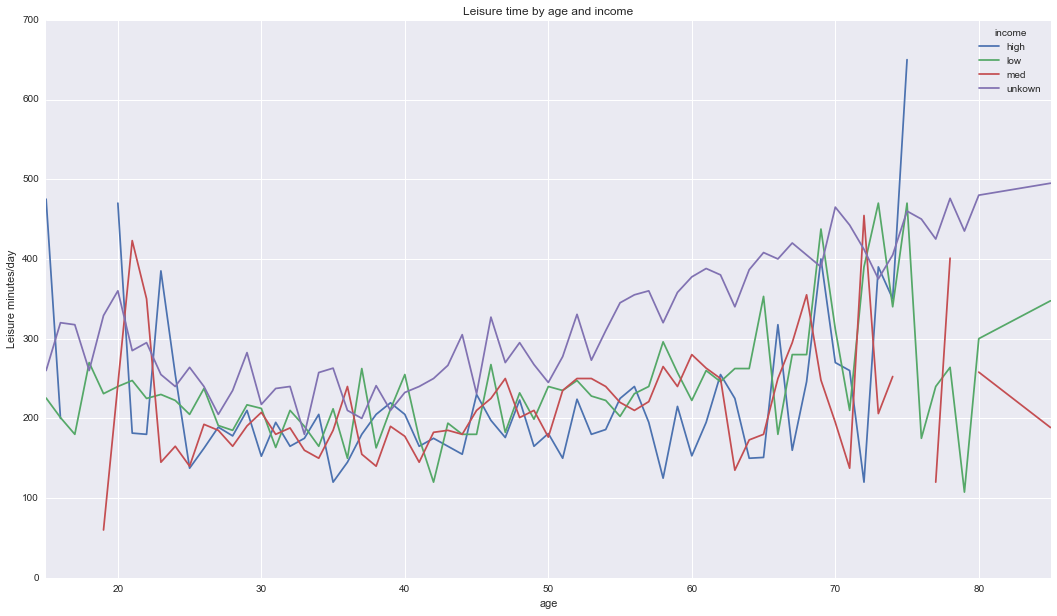

In [95]:
income_grouped = summary.groupby(['age','income'])
income_grouped.leisure.median().unstack().plot()
plt.title("Leisure time by age and income")
plt.ylabel("Leisure minutes/day")

## How most time is spent

In [125]:
summary = pd.read_csv("data/atussum_2014.dat")
activities = summary.columns[summary.columns.str.startswith('t')].drop('tucaseid')

In [170]:
a ={
    't010101' : "sleeping",
    't120303' : "tv and movies (non-religious)",
    't050101' : "working (main job)",
    't110101' : "eating and drinking",
    't120101' : "socializing and communicating with others",
    't010201' : "washing, gooming, dressing self",
    't020201' : "food and drink prep",
    't020101' : "interior cleaning",
    't120312' : "reading for personal interest",
    't120301' : "relaxing, thinking",
    't070104' : "shopping not groceris or gas",
    't120308' : "computer leisure other than games",
    't180501' : "travel related to work",
    't020501' : "lawn, garde, houseplant care",
    't120307' : "playing games",
    't020102' : "laundry",
    't030101' : "physical care for household children",
    't140101' : "attending religious services",
    't020203' : "kitchen and food clean-up",
    't070101' : "grocery shopping",
    't060101' : 'taking classes',
    't060301' : 'waiting associated with classes',
    't030103' : 'playing with household children not sports',
    't120201' : 'attending or hosting parties'
}

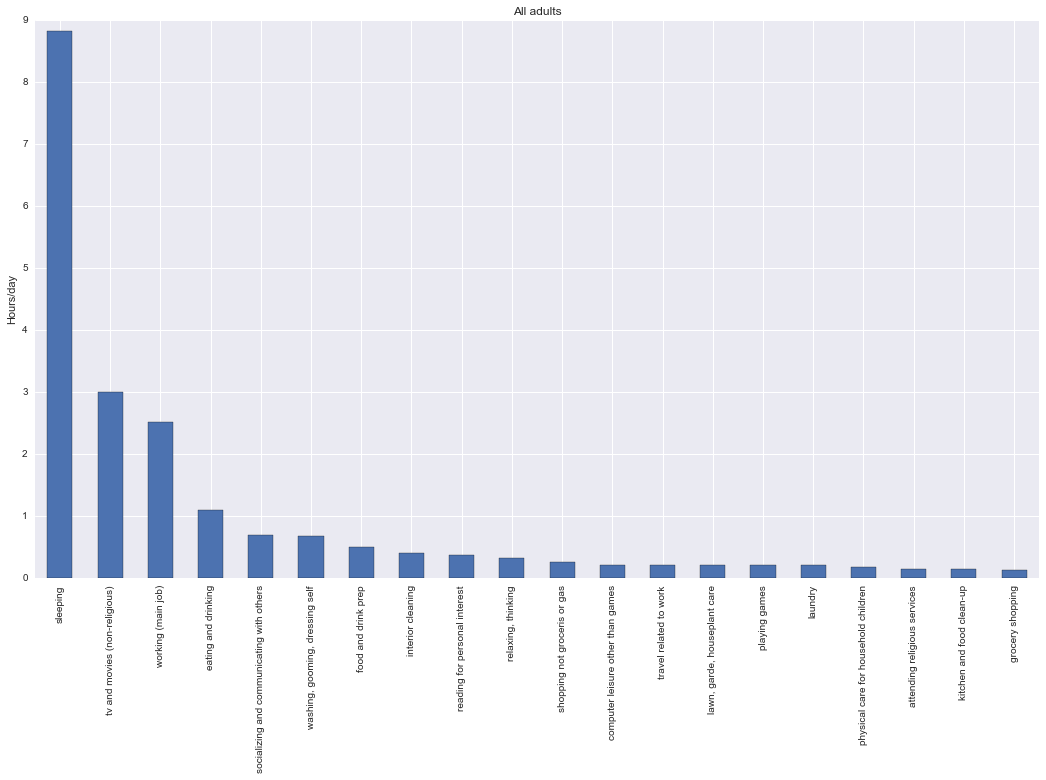

In [171]:
b = (summary.mean()[activities].sort_values(ascending = False)[:20]/60).plot( kind = 'bar')
labels = [a[item.get_text()] for item in b.get_xticklabels()]
b.set_xticklabels(labels)
plt.ylabel("Hours/day")
plt.title("All adults")

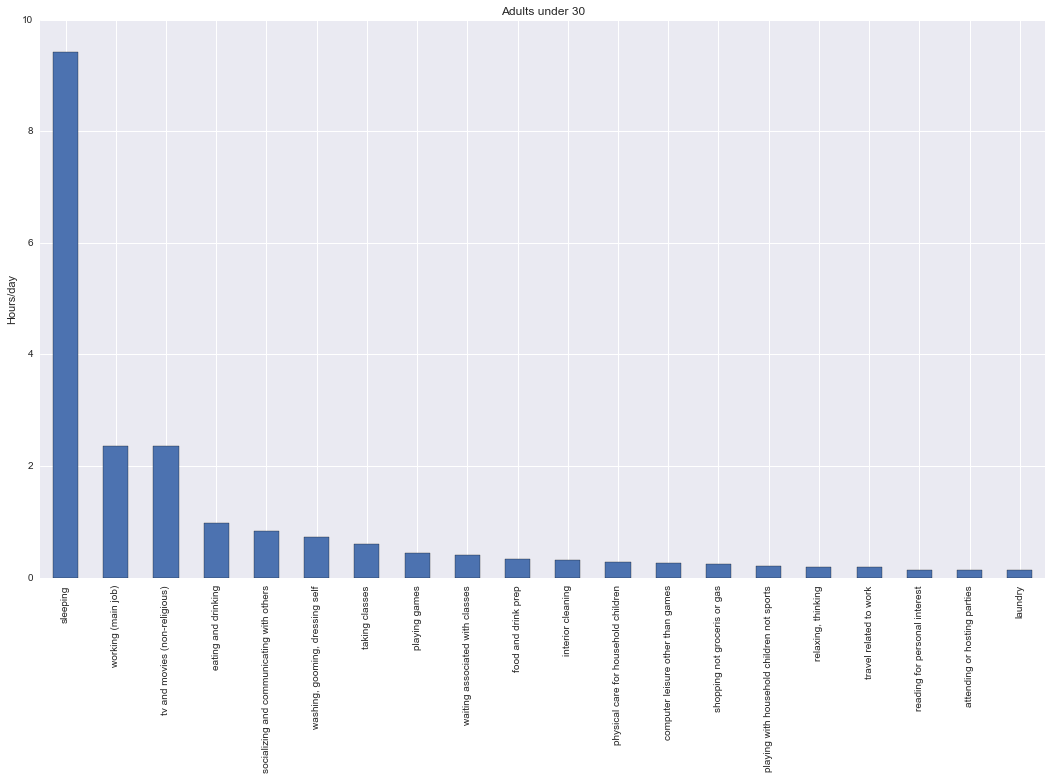

In [172]:
b = (summary[summary.TEAGE<30].mean()[activities].sort_values(ascending = False)[:20]/60).plot( kind = 'bar')
labels = [a[item.get_text()] for item in b.get_xticklabels()]
b.set_xticklabels(labels)
plt.ylabel("Hours/day")
plt.title("Adults under 30")

In [169]:
TRERNWA

NameError: name 'TRERNWA' is not defined